In [ ]:
# Using Diffusion model to generate fall and not fall signals
# Author Xiaomin Li
# Data: 03/18/2023

In [1]:
import numpy as np

In [2]:
# Load the NumPy array from the file
# These numpy array are generated fall and not fall signals saved as numpy array format
sampled_not_fall = np.load('sampled_not_fall.npy')
sampled_fall = np.load('sampled_fall.npy')

In [12]:
# Generated 500 each signals for fall and not fall
# Each signal has a seqence of 96
# Each signal has 3 channels represent x-axis, y-axis and z-axis accelerometer values 
print(sampled_not_fall.shape)
print(sampled_fall.shape)

(500, 3, 96)
(500, 3, 96)


In [3]:
# Load real Fall and not fall signals from a PyTorch dataloader 
# Note: I put all the fall and not fall csv file in a folder and write a loop to get of the signals. 
# Fall data has the label 1 and Not fall data has the label 0
# In the FallDataLoader, I resample each fall and not fall signal to a seqence length 96 
# and standarize signals channel-wisely to [0-1] range
from FallDataLoader import *
dataset = Fall_NotFall_loader(folder_path = '/home/x_l30/Diffusion/Diffusion_Research/datasets/FallData', seq_lenth=96)
real_fall = dataset.standardized_fall_signals
real_not_fall = dataset.standardized_not_fall_signals

(752, 3, 96)
(752,)


/home/x_l30/Diffusion/Diffusion_Research/FallDataLoader.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  filtered_not_fall_signals = np.array([signal for signal in all_not_fall_signals if len(signal) != 1])


In [4]:
#The visualization package has t-sne, pca, and umap metrics to compare the similarity between to sets of signals
from visualization import *

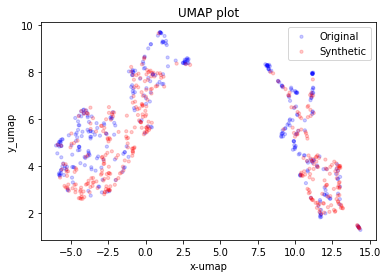

In [5]:
# From this plot we can see the that real not fall signals have a similar latent distribution compared with sample not fall sigals
visualization(real_not_fall, sampled_not_fall, 'umap', 'unimib_not_fall')

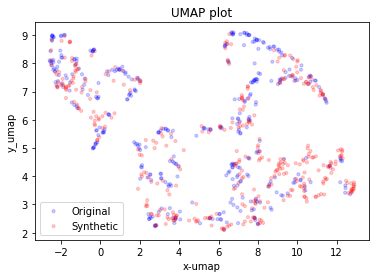

In [6]:
# real fall signals also similar to sampled fall signals
visualization(real_fall, sampled_fall, 'umap', 'unimib_fall')

In [7]:
# visualize 10 raw signals
def plot_signals_cls_free(signals, title):
    dim = signals.shape[1]
    fig, axs = plt.subplots(2, 5, figsize=(20,5))
    for i in range(2):
        for j in range(5):
            for k in range(dim):
                axs[i, j].plot(signals[i*5+j][k][:])
    fig.suptitle(title)
    fig.show()

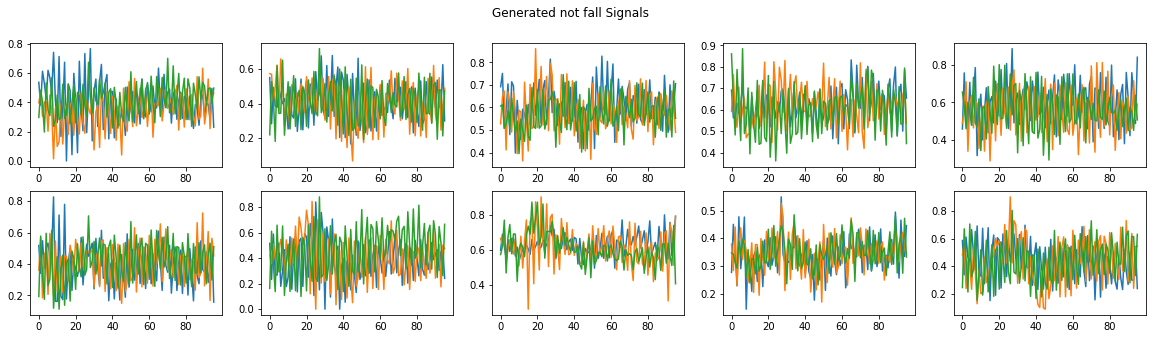

In [8]:
plot_signals_cls_free(sampled_not_fall, 'Generated not fall Signals')

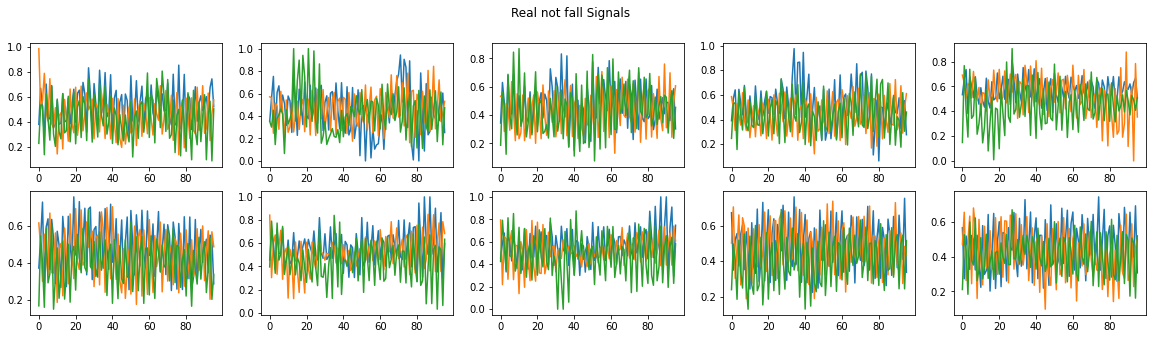

In [9]:
plot_signals_cls_free(real_not_fall, 'Real not fall Signals')

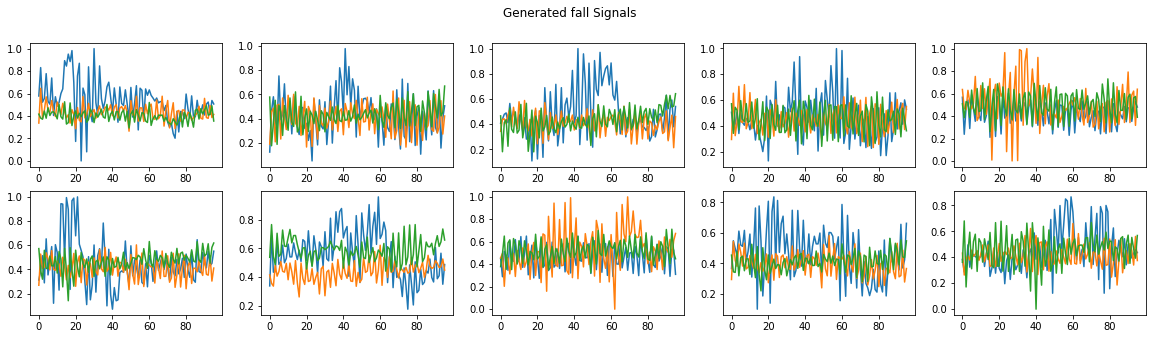

In [10]:
plot_signals_cls_free(sampled_fall, 'Generated fall Signals')

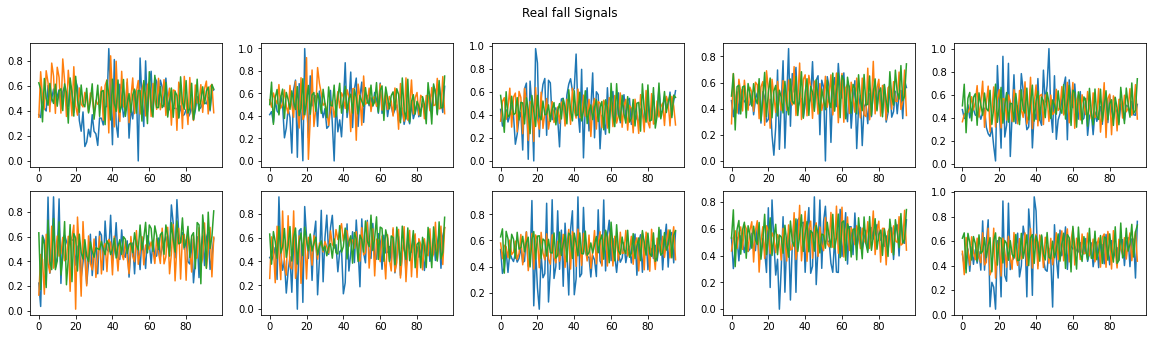

In [11]:
plot_signals_cls_free(real_fall, 'Real fall Signals')

In [ ]:
# By visualizing the real and sampled raw signals, we can see they look very similar